# 02 - Tutorial Titanic Survived Passangers (Models Comparation) 

by: Irfan Imaduddin <br>
contact: irfanimaduddin[at]gmail.com <br>

---

## Setup

Import modules

In [1]:
import ipywidgets
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import validation_curve
from sklearn.metrics import (accuracy_score, 
                             confusion_matrix, 
                             ConfusionMatrixDisplay, 
                             classification_report, 
                             roc_auc_score, 
                             roc_curve)

import warnings
warnings.filterwarnings("ignore")

Read files

In [2]:
df_train = pd.read_csv("train_clean.csv")
df_test = pd.read_csv("test_clean.csv")
df_result = pd.read_csv("gender_submission.csv")

In [3]:
df_train['Survived'] = df_train['Survived'].astype('category')
df_train['Pclass'] = df_train['Pclass'].astype('category')
df_train['Cat_family'] = df_train['Cat_family'].astype('category')
df_train['encoded_sex'] = df_train['encoded_sex'].astype('category')
df_train['encoded_embarked'] = df_train['encoded_embarked'].astype('category')

df_test['Pclass'] = df_test['Pclass'].astype('category')
df_test['Cat_family'] = df_test['Cat_family'].astype('category')
df_test['encoded_sex'] = df_test['encoded_sex'].astype('category')
df_test['encoded_embarked'] = df_test['encoded_embarked'].astype('category')

## Inspect Data

In [4]:
df_train.head()

,Survived,Pclass,Cat_family,encoded_sex,encoded_embarked,scaled_age
0,0,3,1,1,2,-0.565736
1,1,1,1,0,0,0.663861
2,1,3,1,0,2,-0.258337
3,1,1,1,0,2,0.433312
4,0,3,1,1,2,0.433312


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Survived          891 non-null    category
 1   Pclass            891 non-null    category
 2   Cat_family        891 non-null    category
 3   encoded_sex       891 non-null    category
 4   encoded_embarked  891 non-null    category
 5   scaled_age        891 non-null    float64 
dtypes: category(5), float64(1)
memory usage: 11.9 KB


In [6]:
df_test.head()

,Pclass,Cat_family,encoded_sex,encoded_embarked,scaled_age
0,3,1,1,1,0.386231
1,3,1,0,2,1.371370
2,2,1,1,1,2.553537
3,3,1,1,2,-0.204852
4,3,1,0,2,-0.598908


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Pclass            418 non-null    category
 1   Cat_family        418 non-null    category
 2   encoded_sex       418 non-null    category
 3   encoded_embarked  418 non-null    category
 4   scaled_age        418 non-null    float64 
dtypes: category(4), float64(1)
memory usage: 5.4 KB


In [8]:
df_result.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [9]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


### Summary
  
1. **Variable Description** <br>
    a. `Survived`: survival label as the **target** or **dependent** variable (`1` = survived passenger, `0` = not survived or died passenger). <br>
    b. `Pclass`: passenger class. The values are `1`, `2` and `3` which represents for the first class (upper deck), the second class (middle deck) and the third class (lower deck), respectively. <br>
    c. `Cat_family`: number of family abroad on the Titanic. Sum of number of siblings/spouses with parents/children. <br>
    d. `encoded_sex`: encoded gender of passenger. (`1` for `male` and `0` for `female`) <br> 
    e. `encoded_embarked`: encoded port of embarkation for every passenger. `0` for `C` (Cherbourg), `1` for `Q` (Queenstown) and `2` for `S` (Southampton). <br>
    f. `scaled_age`: scaled age of passenger using StandardScaler. <br><br>

2. **Feature types** <br>
    a. **Categorical** : `Survived`, `Pclass`, `Cat_family`, `encoded_sex`, `encoded_embarked`, `scaled_age` <br>
    b. **Numerical** : `scaled_age` <br><br>

3. **Length of dataset** <br>
    a. `df_train` = 891 <br>
    b. `df_test` = 418 <br>
    c. `df_result` = 418 <br> <br>

## Splitting Dataset

Define independent and dependent (target) features

In [10]:
from sklearn.model_selection import train_test_split

y = df_train['Survived']
X = df_train.drop('Survived', axis=1)

# Divide train dataset into train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
    X, # Independent variables
    y, # Dependent variable
    test_size=0.25, # Fraction of test set
    random_state=2022 # Random number seed
)

## Run Individual Models

Several models use in this notebook and will be compared are:
* k-Nearest Neighbors
* Naive Bayes
* Logistic Regression
* Decision Tree
* Random Forest
* Linear SVM
* Non-linear SVM
* Stochastic Gradient Descent
* AdaBoostClassifier
* CatBoostClassifier
* XGBoostClassifier


### k-Nearest Neighbors

Training the model

Training accuracy = 83.86%


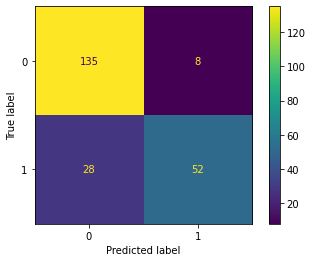

In [11]:
from sklearn.neighbors import KNeighborsClassifier

# Define model
model = KNeighborsClassifier(
    n_neighbors=15, # Number of neighbors to use
    weights='uniform', # Weight function ('uniform or 'distance')
    algorithm='auto', # ('auto', 'ball_tree', 'kd_tree', 'brute')
    metric='manhattan', # The distance metric ("minkowski", "euclidean", "manhattan")
    n_jobs=-1 # Number of parallel jobs to run
)

# Fit model
model.fit(X_train, y_train)

# Predic validation data
predictions = model.predict(X_valid)

# Check training accuracy
print("Training accuracy = {}%".format(np.round(accuracy_score(y_valid, predictions)*100, 2)))

# Display confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_valid, predictions)).plot()
plt.show()

Testing the model

Testing accuracy = 90.19%


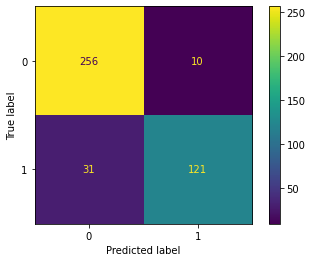

In [12]:
# Predict test data
test_predictions = model.predict(df_test)

# Check training accuracy
print("Testing accuracy = {}%".format(np.round(accuracy_score(df_result['Survived'], test_predictions)*100, 2)))

# Display confusion matrix
ConfusionMatrixDisplay(confusion_matrix(df_result['Survived'], test_predictions)).plot()
plt.show()

# Calculate ROC_AUC score
auc_knn = roc_auc_score(df_result['Survived'], test_predictions)

# Get values of ROC curve
fpr_knn, tpr_knn, thresholds_knn = roc_curve(df_result['Survived'], test_predictions)

### Naive Bayes

Training the model

Training accuracy = 81.17%


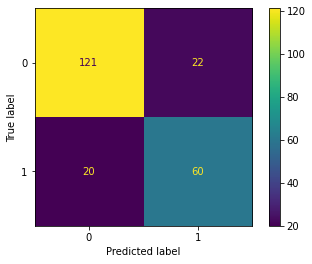

In [13]:
from sklearn.naive_bayes import GaussianNB

# Define model
model = GaussianNB()

# Fit model
model.fit(X_train, y_train)

# Predic validation data
predictions = model.predict(X_valid)

# Check training accuracy
print("Training accuracy = {}%".format(np.round(accuracy_score(y_valid, predictions)*100, 2)))

# Display confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_valid, predictions)).plot()
plt.show()

Testing the model

Testing accuracy = 89.71%


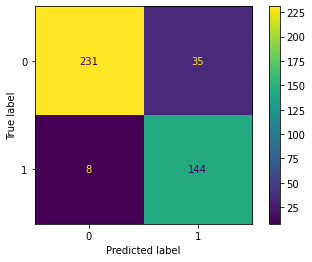

In [14]:
# Predict test data
test_predictions = model.predict(df_test)

# Check training accuracy
print("Testing accuracy = {}%".format(np.round(accuracy_score(df_result['Survived'], test_predictions)*100, 2)))

# Display confusion matrix
ConfusionMatrixDisplay(confusion_matrix(df_result['Survived'], test_predictions)).plot()
plt.show()

# Calculate ROC_AUC score
auc_nb = roc_auc_score(df_result['Survived'], test_predictions)

# Get values of ROC curve
fpr_nb, tpr_nb, thresholds_nb = roc_curve(df_result['Survived'], test_predictions)

### Logistic Regression (aka logit, MaxEnt) Classifier

[official documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

Training the model

Training accuracy = 83.41%


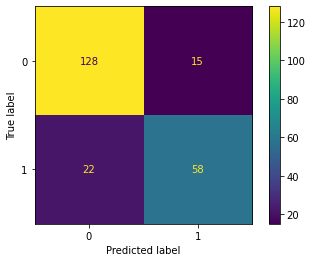

In [15]:
from sklearn.linear_model import LogisticRegression

# Define model
model = LogisticRegression(
    penalty='l2', # Penalty (‘l1’, ‘l2’, ‘elasticnet’, ‘none’)
    C=1., # Inverse of regularization strength
    random_state=2022, # Random number seed
    solver='lbfgs', # (‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’) 
    max_iter=100, # Maximum number of iterations
    multi_class='ovr', # ('auto', 'ovr', 'multinomial')
    n_jobs=-1 # Number of CPU cores used
)

# Fit model
model.fit(X_train, y_train)

# Predic validation data
predictions = model.predict(X_valid)

# Check training accuracy
print("Training accuracy = {}%".format(np.round(accuracy_score(y_valid, predictions)*100, 2)))

# Display confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_valid, predictions)).plot()
plt.show()

Testing the model

Testing accuracy = 93.3%


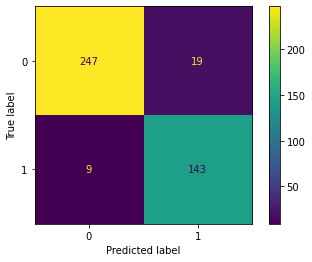

In [16]:
# Predict test data
test_predictions = model.predict(df_test)

# Check training accuracy
print("Testing accuracy = {}%".format(np.round(accuracy_score(df_result['Survived'], test_predictions)*100, 2)))

# Display confusion matrix
ConfusionMatrixDisplay(confusion_matrix(df_result['Survived'], test_predictions)).plot()
plt.show()

# Calculate ROC_AUC score
auc_lr = roc_auc_score(df_result['Survived'], test_predictions)

# Get values of ROC curve
fpr_lr, tpr_lr, thresholds_lr = roc_curve(df_result['Survived'], test_predictions)

### Decision Tree

Training the model

Training accuracy = 80.27%


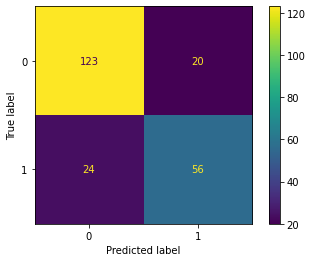

In [17]:
from sklearn.tree import DecisionTreeClassifier

# Define model
model = DecisionTreeClassifier(
    criterion='gini', # The function to measure the quality of a split (“gini”, “entropy”, “log_loss”) 
    splitter='best', # Strategy used to choose the split at each node ("best" or "random")
    max_depth=1, # Maximum depth of the tree
    random_state=2022 # Random number seed
)

# Fit model
model.fit(X_train, y_train)

# Predic validation data
predictions = model.predict(X_valid)

# Check training accuracy
print("Training accuracy = {}%".format(np.round(accuracy_score(y_valid, predictions)*100, 2)))

# Display confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_valid, predictions)).plot()
plt.show()

Testing the model

Testing accuracy = 100.0%


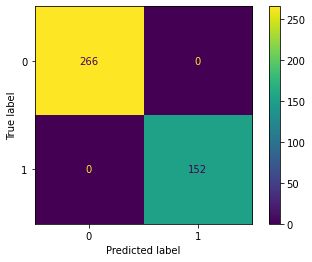

In [18]:
# Predict test data
test_predictions = model.predict(df_test)

# Check training accuracy
print("Testing accuracy = {}%".format(np.round(accuracy_score(df_result['Survived'], test_predictions)*100, 2)))

# Display confusion matrix
ConfusionMatrixDisplay(confusion_matrix(df_result['Survived'], test_predictions)).plot()
plt.show()

# Calculate ROC_AUC score
auc_dt = roc_auc_score(df_result['Survived'], test_predictions)

# Get values of ROC curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(df_result['Survived'], test_predictions)

### Random Forest

Training the model

Training accuracy = 80.27%


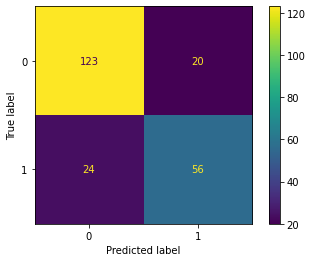

In [19]:
from sklearn.ensemble import RandomForestClassifier

# Define model
model = RandomForestClassifier(
    n_estimators=100, # Number of trees in the forest
    criterion='gini', # The function to measure the quality of a split (“gini”, “entropy”, “log_loss”) 
    max_depth=1, # Maximum depth of the tree
    random_state=2022 # Random number seed
)

# Fit model
model.fit(X_train, y_train)

# Predic validation data
predictions = model.predict(X_valid)

# Check training accuracy
print("Training accuracy = {}%".format(np.round(accuracy_score(y_valid, predictions)*100, 2)))

# Display confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_valid, predictions)).plot()
plt.show()

Testing the model

Testing accuracy = 100.0%


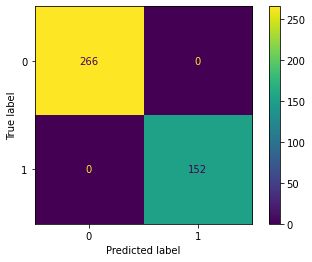

In [20]:
# Predict test data
test_predictions = model.predict(df_test)

# Check training accuracy
print("Testing accuracy = {}%".format(np.round(accuracy_score(df_result['Survived'], test_predictions)*100, 2)))

# Display confusion matrix
ConfusionMatrixDisplay(confusion_matrix(df_result['Survived'], test_predictions)).plot()
plt.show()

# Calculate ROC_AUC score
auc_rf = roc_auc_score(df_result['Survived'], test_predictions)

# Get values of ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(df_result['Survived'], test_predictions)

### Linear SVM

Training the model

Training accuracy = 80.27%


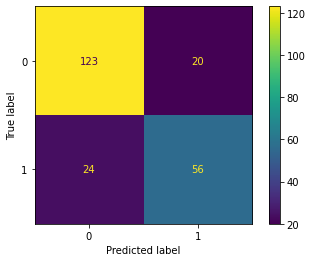

In [21]:
from sklearn.svm import SVC

# Define model
model = SVC(
    C=0.025, # Regularization parameter
    kernel='linear', # Kernel type
    degree=3, # Degree of the polynomial kernel function
    gamma='scale', # Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. Values are 'scale' and 'auto'.
    max_iter=-1, # Limit on iterations within solver
    random_state=2022 # Random number seed
)

# Fit model
model.fit(X_train, y_train)

# Predic validation data
predictions = model.predict(X_valid)

# Check training accuracy
print("Training accuracy = {}%".format(np.round(accuracy_score(y_valid, predictions)*100, 2)))

# Display confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_valid, predictions)).plot()
plt.show()

Testing the model

Testing accuracy = 100.0%


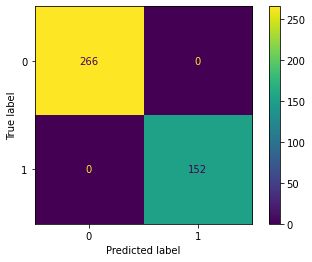

In [22]:
# Predict test data
test_predictions = model.predict(df_test)

# Check training accuracy
print("Testing accuracy = {}%".format(np.round(accuracy_score(df_result['Survived'], test_predictions)*100, 2)))

# Display confusion matrix
ConfusionMatrixDisplay(confusion_matrix(df_result['Survived'], test_predictions)).plot()
plt.show()

# Calculate ROC_AUC score
auc_lsvm = roc_auc_score(df_result['Survived'], test_predictions)

# Get values of ROC curve
fpr_lsvm, tpr_lsvm, thresholds_lsvm = roc_curve(df_result['Survived'], test_predictions)

### Non-linear SVM

Training the model

Training accuracy = 82.96%


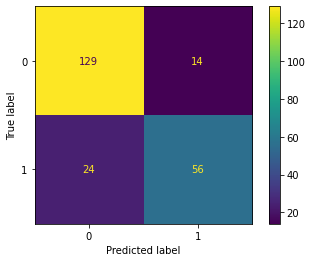

In [23]:
from sklearn.svm import SVC

# Define model
model = SVC(
    C=1., # Regularization parameter
    kernel='rbf', # Kernel type ('linear', 'poly', 'rbf', 'sigmoid', 'precomputed')
    degree=3, # Degree of the polynomial kernel function
    gamma='scale', # Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. Values are 'scale' and 'auto'.
    max_iter=-1, # Limit on iterations within solver
    random_state=2022 # Random number seed
)

# Fit model
model.fit(X_train, y_train)

# Predic validation data
predictions = model.predict(X_valid)

# Check training accuracy
print("Training accuracy = {}%".format(np.round(accuracy_score(y_valid, predictions)*100, 2)))

# Display confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_valid, predictions)).plot()
plt.show()

Testing the model

Testing accuracy = 97.13%


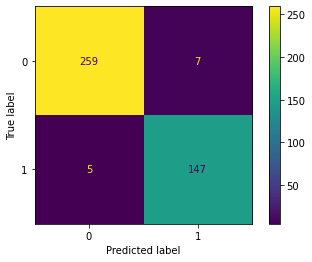

In [24]:
# Predict test data
test_predictions = model.predict(df_test)

# Check training accuracy
print("Testing accuracy = {}%".format(np.round(accuracy_score(df_result['Survived'], test_predictions)*100, 2)))

# Display confusion matrix
ConfusionMatrixDisplay(confusion_matrix(df_result['Survived'], test_predictions)).plot()
plt.show()

# Calculate ROC_AUC score
auc_svm = roc_auc_score(df_result['Survived'], test_predictions)

# Get values of ROC curve
fpr_svm, tpr_svm, thresholds_svm = roc_curve(df_result['Survived'], test_predictions)

### Stochastic Gradient Descent

Training the model

Training accuracy = 82.06%


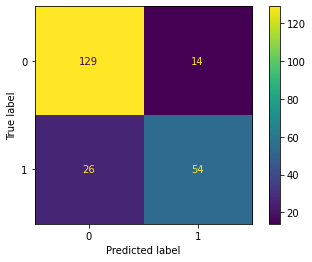

In [25]:
from sklearn.linear_model import SGDClassifier

# Define model
model = SGDClassifier(
    loss='hinge', # Loss function (‘hinge’, ‘log_loss’, ‘log’, ‘modified_huber’, ‘squared_hinge’, ‘perceptron’, ‘squared_error’, ‘huber’, ‘epsilon_insensitive’, ‘squared_epsilon_insensitive’)
    penalty='l2', # Regularization term (‘l2’, ‘l1’, ‘elasticnet’)
    max_iter=1000, # Epochs
    shuffle=True, # Shuffle training data
    n_jobs=-1, # Number of CPUs to use
    random_state=2022, # Random number seed 
    learning_rate='adaptive', # Learning rate schedule (‘constant’, ‘optimal’, ‘invscaling’, ‘adaptive’)
    eta0=1.0 # Initial learning rate
)

# Fit model
model.fit(X_train, y_train)

# Predic validation data
predictions = model.predict(X_valid)

# Check training accuracy
print("Training accuracy = {}%".format(np.round(accuracy_score(y_valid, predictions)*100, 2)))

# Display confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_valid, predictions)).plot()
plt.show()

Testing the model

Testing accuracy = 98.09%


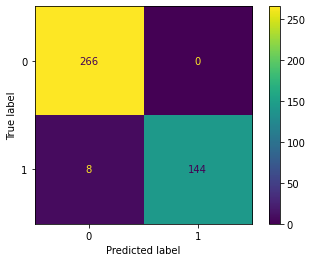

In [26]:
# Predict test data
test_predictions = model.predict(df_test)

# Check training accuracy
print("Testing accuracy = {}%".format(np.round(accuracy_score(df_result['Survived'], test_predictions)*100, 2)))

# Display confusion matrix
ConfusionMatrixDisplay(confusion_matrix(df_result['Survived'], test_predictions)).plot()
plt.show()

# Calculate ROC_AUC score
auc_sgd = roc_auc_score(df_result['Survived'], test_predictions)

# Get values of ROC curve
fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(df_result['Survived'], test_predictions)

### AdaBoostClassifier

AdaBoostClassifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases. Please see the [official documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier).

Training the model

Training accuracy = 80.27%


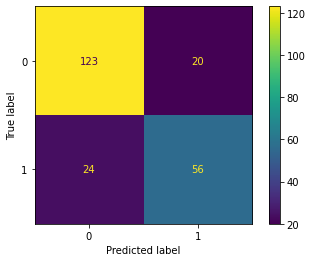

In [27]:
from sklearn.ensemble import AdaBoostClassifier

# Define model
model = AdaBoostClassifier(
    base_estimator=None,
    n_estimators=100, # Maximum number of estimators
    learning_rate=.001, # Learning rate
    algorithm='SAMME.R', # (‘SAMME’, ‘SAMME.R’)
    random_state=2022 # Random number seed
)

# Fit model
model.fit(X_train, y_train)

# Predic validation data
predictions = model.predict(X_valid)

# Check training accuracy
print("Training accuracy = {}%".format(np.round(accuracy_score(y_valid, predictions)*100, 2)))

# Display confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_valid, predictions)).plot()
plt.show()

Testing the model

Testing accuracy = 100.0%


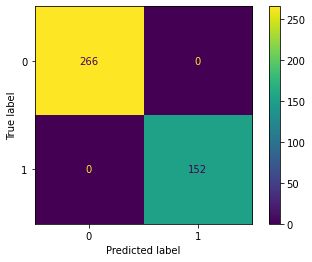

In [28]:
# Predict test data
test_predictions = model.predict(df_test)

# Check training accuracy
print("Testing accuracy = {}%".format(np.round(accuracy_score(df_result['Survived'], test_predictions)*100, 2)))

# Display confusion matrix
ConfusionMatrixDisplay(confusion_matrix(df_result['Survived'], test_predictions)).plot()
plt.show()

# Calculate ROC_AUC score
auc_ada = roc_auc_score(df_result['Survived'], test_predictions)

# Get values of ROC curve
fpr_ada, tpr_ada, thresholds_ada = roc_curve(df_result['Survived'], test_predictions)

### CatBoostClassifier (Classification using Gradient Boosting on Decision Trees)

Training the model

0:	learn: 0.7814371	test: 0.8026906	best: 0.8026906 (0)	total: 148ms	remaining: 593ms
1:	learn: 0.7814371	test: 0.8026906	best: 0.8026906 (0)	total: 152ms	remaining: 228ms
2:	learn: 0.7814371	test: 0.8026906	best: 0.8026906 (0)	total: 158ms	remaining: 105ms
3:	learn: 0.7814371	test: 0.8026906	best: 0.8026906 (0)	total: 173ms	remaining: 43.2ms
4:	learn: 0.7814371	test: 0.8026906	best: 0.8026906 (0)	total: 184ms	remaining: 0us

bestTest = 0.802690583
bestIteration = 0

Shrink model to first 1 iterations.
Training accuracy = 80.27%


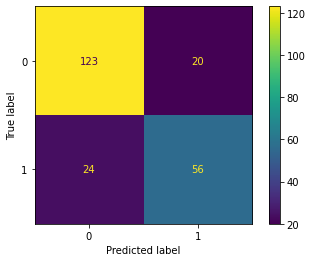

In [29]:
import catboost as cb

# Define model
model = cb.CatBoostClassifier(
    iterations=5,
    learning_rate=0.01,
    depth=5,
    loss_function="Logloss",
    eval_metric="Accuracy",
    random_state=2022
)

# Fit model
cat_features = ['Pclass', 'Cat_family', 'encoded_sex', 'encoded_embarked']
model.fit(X_train, y_train, cat_features=cat_features, plot=False, eval_set=(X_valid, y_valid))

# Predic validation data
predictions = model.predict(X_valid)

# Check training accuracy
print("Training accuracy = {}%".format(np.round(accuracy_score(y_valid, predictions)*100, 2)))

# Display confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_valid, predictions)).plot()
plt.show()

Testing the model

Testing accuracy = 100.0%


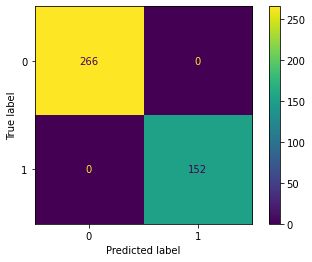

In [30]:
# Predict test data
test_predictions = model.predict(df_test)

# Check training accuracy
print("Testing accuracy = {}%".format(np.round(accuracy_score(df_result['Survived'], test_predictions)*100, 2)))

# Display confusion matrix
ConfusionMatrixDisplay(confusion_matrix(df_result['Survived'], test_predictions)).plot()
plt.show()

# Calculate ROC_AUC score
auc_cat = roc_auc_score(df_result['Survived'], test_predictions)

# Get values of ROC curve
fpr_cat, tpr_cat, thresholds_cat = roc_curve(df_result['Survived'], test_predictions)

### XGBoost

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. For now, XGBoost can't deal with categorical data type. So, let's change any feature which having categorical type. Further information, please see [official documentation](https://xgboost.readthedocs.io/en/latest/).

Change feature type and split train and valid data

In [31]:
df_train['Survived'] = df_train['Survived'].astype('int')
df_train['Pclass'] = df_train['Pclass'].astype('int')
df_train['Cat_family'] = df_train['Cat_family'].astype('int')
df_train['encoded_sex'] = df_train['encoded_sex'].astype('int')
df_train['encoded_embarked'] = df_train['encoded_embarked'].astype('int')

df_test['Pclass'] = df_test['Pclass'].astype('int')
df_test['Cat_family'] = df_test['Cat_family'].astype('int')
df_test['encoded_sex'] = df_test['encoded_sex'].astype('int')
df_test['encoded_embarked'] = df_test['encoded_embarked'].astype('int')

In [32]:
from sklearn.model_selection import train_test_split

y = df_train['Survived']
X = df_train.drop('Survived', axis=1)

# Divide train dataset into train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
    X, # Independent variables
    y, # Dependent variable
    test_size=0.25, # Fraction of test set
    random_state=2022 # Random number seed
)

Training the model

Training accuracy = 80.27%


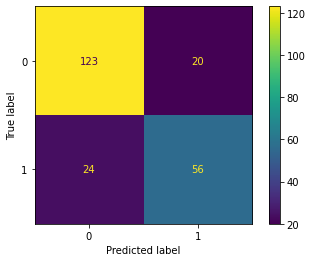

In [33]:
import xgboost as xgb

# Define model
model = xgb.XGBClassifier(
    n_estimators= 100, # Number of boosting rounds
    max_depth=1, # Maximum tree depth for base learners
    learning_rate = 0.01, # Boosting learning rate
    objective= 'binary:logistic', # Learning task ()
    n_jobs=-1, # Number of parallel threads used to run xgboost
    gamma=1., # Minimum loss reduction required to make a further partition on a leaf node of the tree
    min_child_weight= 2, # Minimum sum of instance weight(hessian) needed in a child
    subsample=0.8, # Subsample ratio of the training instance
    colsample_bytree=0.8, # Subsample ratio of columns when constructing each tree
    scale_pos_weight=1, # Balancing of positive and negative weights
    random_state=2022, # Random number seed
    eval_metric="logloss" # Metric used for monitoring the training result and early stopping
)

# Fit model
model.fit(X_train, y_train)

# Predic validation data
predictions = model.predict(X_valid)

# Check training accuracy
print("Training accuracy = {}%".format(np.round(accuracy_score(y_valid, predictions)*100, 2)))

# Display confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_valid, predictions)).plot()
plt.show()

Options for some parameters:
* **objective** ("reg:squarederror", "reg:squaredlogerror", "reg:logistic", "reg:pseudohubererror", "reg:absoluteerror", "binary:logistic", "binary:logitraw", "binary:hinge", "count:poisson", "survival:cox", "survival:aft", "aft_loss_distribution", "multi:softmax", "multi:softprob", "rank:pairwise", "rank:ndcg", "rank:map", "reg:gamma", "reg:tweedie")

* **eval_metric** ("rmse", "rmsle", "mae", "mape", "mphe", "logloss", "error", "error@t", "merror", "mlogloss", "auc", "aucpr", "ndcg", "map", "ndcg@n", "map@n", "ndcg-", "map-", "ndcg@n-", "map@n-", "poisson-nloglik", "gamma-nloglik", "cox-nloglik", "gamma-deviance", "tweedie-nloglik", "aft-nloglik", "interval-regression-accuracy") 

Testing the model

Testing accuracy = 100.0%


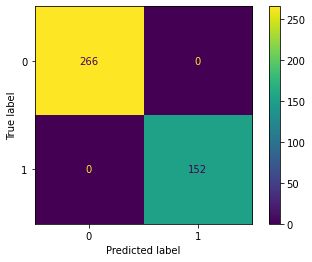

In [34]:
# Predict test data
test_predictions = model.predict(df_test)

# Check training accuracy
print("Testing accuracy = {}%".format(np.round(accuracy_score(df_result['Survived'], test_predictions)*100, 2)))

# Display confusion matrix
ConfusionMatrixDisplay(confusion_matrix(df_result['Survived'], test_predictions)).plot()
plt.show()

# Calculate ROC_AUC score
auc_xgb = roc_auc_score(df_result['Survived'], test_predictions)

# Get values of ROC curve
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(df_result['Survived'], test_predictions)

### Moreee

## Comparing the models

ROC Curve

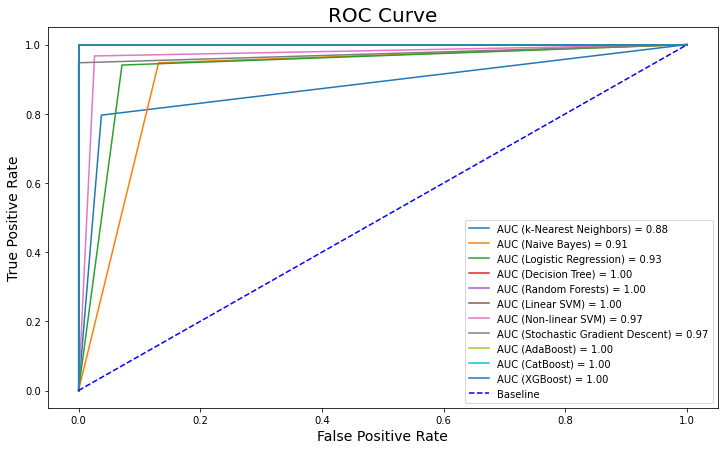

In [35]:
plt.figure(figsize=(12, 7))
plt.plot(fpr_knn, tpr_knn, label=f'AUC (k-Nearest Neighbors) = {auc_knn:.2f}')
plt.plot(fpr_nb, tpr_nb, label=f'AUC (Naive Bayes) = {auc_nb:.2f}')
plt.plot(fpr_lr, tpr_lr, label=f'AUC (Logistic Regression) = {auc_lr:.2f}')
plt.plot(fpr_dt, tpr_dt, label=f'AUC (Decision Tree) = {auc_dt:.2f}')
plt.plot(fpr_rf, tpr_rf, label=f'AUC (Random Forests) = {auc_rf:.2f}')
plt.plot(fpr_lsvm, tpr_lsvm, label=f'AUC (Linear SVM) = {auc_lsvm:.2f}')
plt.plot(fpr_svm, tpr_svm, label=f'AUC (Non-linear SVM) = {auc_svm:.2f}')
plt.plot(fpr_sgd, tpr_sgd, label=f'AUC (Stochastic Gradient Descent) = {auc_sgd:.2f}')
plt.plot(fpr_ada, tpr_ada, label=f'AUC (AdaBoost) = {auc_ada:.2f}')
plt.plot(fpr_cat, tpr_cat, label=f'AUC (CatBoost) = {auc_cat:.2f}')
plt.plot(fpr_xgb, tpr_xgb, label=f'AUC (XGBoost) = {auc_xgb:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend()
plt.show()

ROC-AUC score

In [42]:
index = [
    "k-Nearest Neighbors",
    "Naive Bayes",
    "Logistic Regression", 
    "Decision Tree",
    "Random Forests", 
    "Linear SVM",
    "Non-linear SVM",
    "Stochastic Gradient Descent",
    "AdaBoost", 
    "CatBoost", 
    "XGBoost"
]
    
roc_auc = [
    auc_knn,
    auc_nb,
    auc_lr, 
    auc_dt,
    auc_rf,
    auc_lsvm,
    auc_svm,
    auc_sgd,
    auc_ada,
    auc_cat,
    auc_xgb
]

data = pd.DataFrame(data=accuracy, index=index, columns=['roc_auc'])

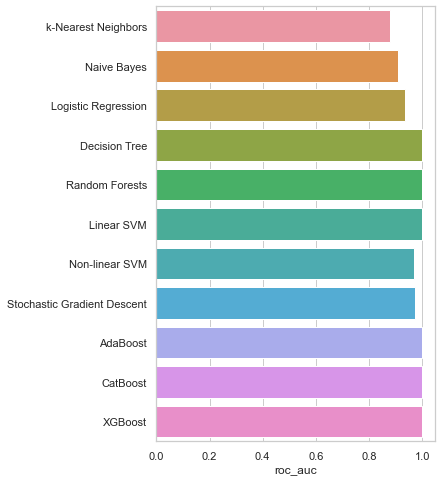

In [43]:
plt.figure(figsize=(5, 8))
sns.set_theme(style="whitegrid")
ax = sns.barplot(data=data, x="roc_auc", y=data.index)
plt.show()